In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2
import glob
from PIL import Image

In [3]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings("ignore")

# **Data Collection**

In [6]:
X = []
Y = []

In [7]:
def calc_hu_moments(img):
    moments = cv2.moments(img)
    hu_moments = cv2.HuMoments(moments)
    result = -np.sign(hu_moments) * np.log10(np.abs(hu_moments))
    return result

In [8]:
def high_boost_spatial_filter(img):
  kernel = np.array([[-1, -1, -1],
                     [-1, 11, -1],
                     [-1, -1, -1]])

  filter_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

  return filter_img

## **Bridge Decks**

In [9]:
bd_class1 = f"/Users/tipsijadav/Documents/crack_detection/data/D/CD/*"
bd_files_class1 = glob.glob(bd_class1)
bd_files_class1 = np.random.choice(bd_files_class1, size=2000, replace=False)

bd_class2 = f"/Users/tipsijadav/Documents/crack_detection/data/D/UD/*"
bd_files_class2 = glob.glob(bd_class2)
bd_files_class2 = np.random.choice(bd_files_class2, size=2000, replace=False)


In [10]:
for i in range(len(bd_files_class1)):
        image_read = Image.open(f"{bd_files_class1[i]}")
        image_color = np.array(image_read)
        
        image_hbf = high_boost_spatial_filter(image_color)
        image_gray = cv2.cvtColor(image_hbf, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(1)

In [11]:
for i in range(len(bd_files_class2)):
        image_read = Image.open(f"{bd_files_class2[i]}")
        image_color = np.array(image_read)
        
        image_hbf = high_boost_spatial_filter(image_color)
        image_gray = cv2.cvtColor(image_hbf, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(0)

## **Walls**

In [12]:
w_class1 = f"/Users/tipsijadav/Documents/crack_detection/data/W/CW/*"
w_files_class1 = glob.glob(w_class1)
w_files_class1 = np.random.choice(w_files_class1, size=2000, replace=False)

w_class2 = f"/Users/tipsijadav/Documents/crack_detection/data/W/UW/*"
w_files_class2 = glob.glob(w_class2)
w_files_class2 = np.random.choice(w_files_class2, size=2000, replace=False)

In [13]:
for i in range(len(w_files_class1)):
        image_read = Image.open(f"{w_files_class1[i]}")
        image_color = np.array(image_read)
        
        image_hbf = high_boost_spatial_filter(image_color)
        image_gray = cv2.cvtColor(image_hbf, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(1)

In [14]:
for i in range(len(w_files_class2)):
        image_read = Image.open(f"{w_files_class2[i]}")
        image_color = np.array(image_read)
        
        image_hbf = high_boost_spatial_filter(image_color)
        image_gray = cv2.cvtColor(image_hbf, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(0)

## **Pavements**

In [15]:
p_class1 = f"/Users/tipsijadav/Documents/crack_detection/data/P/CP/*"
p_files_class1 = glob.glob(p_class1)
p_files_class1 = np.random.choice(p_files_class1, size=2000, replace=False)

p_class2 = f"/Users/tipsijadav/Documents/crack_detection/data/P/UP/*"
p_files_class2 = glob.glob(p_class2)
p_files_class2 = np.random.choice(p_files_class2, size=2000, replace=False)

In [16]:
for i in range(len(p_files_class1)):
        image_read = Image.open(f"{p_files_class1[i]}")
        image_color = np.array(image_read)
        
        image_hbf = high_boost_spatial_filter(image_color)
        image_gray = cv2.cvtColor(image_hbf, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(1)

In [17]:
for i in range(len(p_files_class2)):
        image_read = Image.open(f"{p_files_class2[i]}")
        image_color = np.array(image_read)
        
        image_hbf = high_boost_spatial_filter(image_color)
        image_gray = cv2.cvtColor(image_hbf, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(0)

In [18]:
X = np.array(X)
Y = np.array(Y)

In [19]:
data = np.hstack((X, Y.reshape(-1, 1)))

data_cleaned = data[~np.isnan(data).any(axis=1)]

X = data_cleaned[:, :-1]
Y = data_cleaned[:, -1].astype(int)

# **Train-Test Split**

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# **Standard Scaler**

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Principal Component Analysis**

In [22]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# **Support Vector Machine**

In [26]:
classes = ["Crack", "No-crack"]

In [27]:
svm_classifier = SVC(random_state=42)

In [28]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3],
    }

In [29]:
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_pca, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ....................C=0.01, degree=2, kernel=linear; total time=   0.5s
[CV] END ....................C=0.01, degree=2, kernel=linear; total time=   0.5s
[CV] END ....................C=0.01, degree=2, kernel=linear; total time=   0.5s
[CV] END ....................C=0.01, degree=2, kernel=linear; total time=   0.5s
[CV] END ....................C=0.01, degree=2, kernel=linear; total time=   0.5s
[CV] END .......................C=0.01, degree=2, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.01, degree=2, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.01, degree=2, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.01, degree=2, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.01, degree=2, kernel=rbf; total time=   0.9s
[CV] END ......................C=0.01, degree=2, kernel=poly; total time=   0.5s
[CV] END ......................C=0.01, degree=2

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [30]:
best_params = grid_search.best_params_
print("Best Parameters:\n")
print(f"C:{best_params['C']}")
print(f"kernel:{best_params['kernel']}")
print(f"degree:{best_params['degree']}")

Best Parameters:

C:10
kernel:rbf
degree:2


In [ ]:
svm = SVC(C=best_params['C'], kernel=best_params['kernel'], degree=best_params['degree'], probability=True)
svm.fit(X_train_pca, Y_train)

# **Pipeline**

In [37]:
combined_list = np.concatenate((bd_files_class1, w_files_class1, p_files_class1))
selected_images = np.random.choice(combined_list, size=5, replace=False)

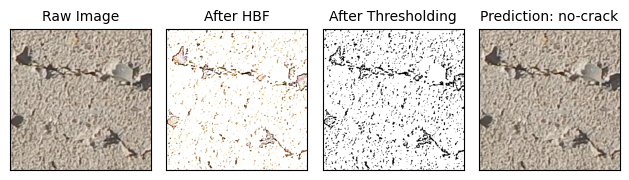

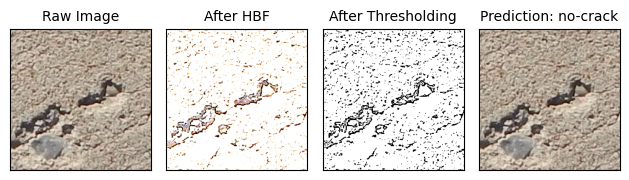

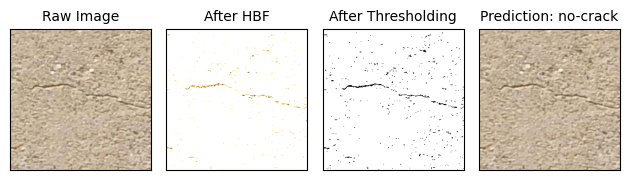

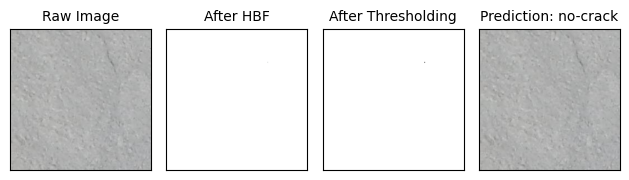

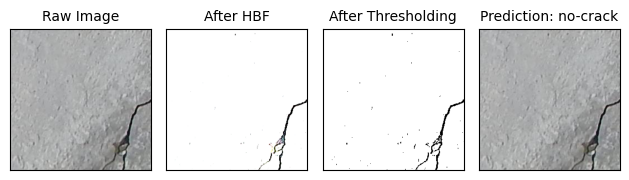

In [38]:
for i in range(len(selected_images)):
    image_read = Image.open(f"{selected_images[i]}")
    image_color = np.array(image_read)
            
    image_hbf = high_boost_spatial_filter(image_color)
    image_gray = cv2.cvtColor(image_hbf, cv2.COLOR_RGB2GRAY)
    image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)

    hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
    hu_moments_da = np.abs(hu_moments_da)
    phi_values = hu_moments_da[0][:].reshape(1,-1)

    phi_values_pca = pca.transform(phi_values)
    pred_b = svm.predict(phi_values_pca)

    if pred_b[0] == 0:
        pred = "crack"
    else:
        pred = "no-crack"

    plt.subplot(1, 4, 1)
    plt.imshow(image_color)
    plt.title("Raw Image", fontsize=10)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 4, 2)
    plt.imshow(image_hbf)
    plt.title("After HBF", fontsize=10)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 4, 3)
    plt.imshow(image_thresh, cmap="gray")
    plt.title("After Thresholding", fontsize=10)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 4, 4)
    plt.imshow(image_color)
    plt.title(f"Prediction: {pred}", fontsize=10)
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()